# US-Border-Crossing-Data-Analysis #

This project is in reference to https://www.kaggle.com/divyansh22/us-border-crossing-data

<img src="https://www.theglobeandmail.com/resizer/xI5H0RpvVb8y6HaRPGA4zNg_YKs=/3097x0/filters:quality(80)/cloudfront-us-east-1.images.arcpublishing.com/tgam/BSU735JBTZLXXHH46JGSLBAUZ4.JPG" width=80%>


The data file consists of the following:-

    1. Port Name:- Name of the port from which the border is crossed.
    2. State:- State
    3. Port Code:- Unique port code
    4. Border:- Border(US-Canada or US-Mexico)
    5. Date:- Date of crossing the border
    6. Measure:- Mode of transportation.
    7. Value:- Counts of people crossing

The libraries used in the project are:-

    1. numpy
    2. pandas
    3. matplotlib
    4. sklearn
    5. os

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import seaborn as sns
sns.set_style('dark')
%matplotlib inline

pf = pd.read_csv("./Border_Crossing_Entry_Data.csv")
pf.head()

,Port Name,State,Port Code,Border,Date,Measure,Value
0,Alcan,AK,3104,US-Canada Border,02-01-2020,Personal Vehicle Passengers,1414
1,Alcan,AK,3104,US-Canada Border,03-01-2020,Personal Vehicles,763
2,Alcan,AK,3104,US-Canada Border,04-01-2020,Truck Containers Empty,412
3,Alcan,AK,3104,US-Canada Border,05-01-2020,Truck Containers Full,122
4,Alcan,AK,3104,US-Canada Border,06-01-2020,Trucks,545


## Problem Understanding ##

The General Questions formed:-

    1. Which is the leading neighbouring country from which a huge number of people cross the border?
    2. What is the most prefered Measure in order to cross the border?
    3. Which ports are more sensitive areas?
    4. Is there any specific relation with the count of border crossing with the Date?
    5. How well can the Value be predicted? What aspects correlate well to the number od people crossing the border?


## Data Understanding ##

It is always essential to look the type of data which is used.

Starting from the dimensions of input data 


In [2]:
(rows,column) = pf.shape

In [3]:
rows, column

(355511, 7)

Therefore the dataset contains 355511 rows and 7 columns in total

In [4]:
# The total number of blank cells in the dataset

np.sum(pf.isnull())

Port Name    0
State        0
Port Code    0
Border       0
Date         0
Measure      0
Value        0
dtype: int64

In [5]:
pf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 355511 entries, 0 to 355510
Data columns (total 7 columns):
Port Name    355511 non-null object
State        355511 non-null object
Port Code    355511 non-null int64
Border       355511 non-null object
Date         355511 non-null object
Measure      355511 non-null object
Value        355511 non-null int64
dtypes: int64(2), object(5)
memory usage: 19.0+ MB


## Question 1 ##
As there is no presence of blank data, therefore we can directly go to our first question.

In [6]:
pf.groupby("Border").sum()["Value"].sort_values()

Border
US-Canada Border    2776127401
US-Mexico Border    7337300710
Name: Value, dtype: int64

Text(0.5, 1.0, 'Which Border is more exposed?')

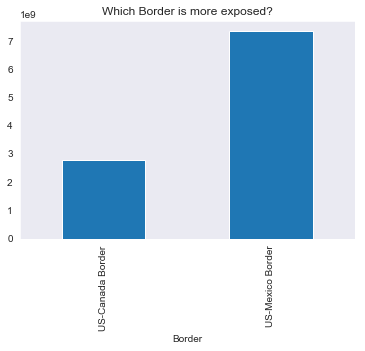

In [7]:
pf.groupby("Border").sum()["Value"].sort_values().plot(kind = 'bar');
plt.title("Which Border is more exposed?")

Hence, Clearly through the bar chart we get our answer for 1st Question, the <b> US-Mexico Border </b> is more vurnerable to people crossing the border

## Question 2 ##

The importance of Measure in crossing the border

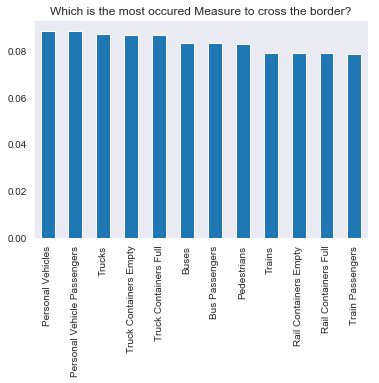

In [8]:
m_val = pf.Measure.value_counts()

(m_val/rows).plot(kind = 'bar');
plt.title("Which is the most occured Measure to cross the border?");

The exact share of values of Measures will be beneficial 

In [9]:
pf.groupby("Measure").sum()["Value"].sort_values()

Measure
Trains                             933270
Train Passengers                  6472717
Buses                             8754394
Rail Containers Empty            22386399
Rail Containers Full             40492650
Truck Containers Empty           67036035
Bus Passengers                  146027374
Truck Containers Full           185463194
Trucks                          264731943
Pedestrians                    1090067964
Personal Vehicles              2651535415
Personal Vehicle Passengers    5629526756
Name: Value, dtype: int64

Text(0.5, 1.0, 'Which is the most used measure to vross the border?')

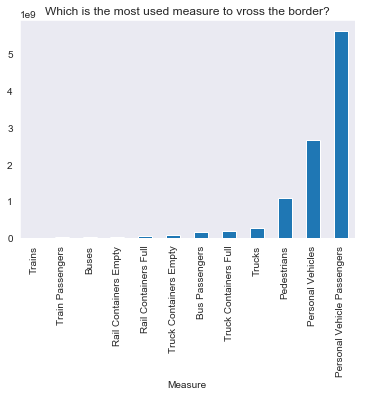

In [10]:
pf.groupby("Measure").sum()["Value"].sort_values().plot(kind = 'bar');
plt.title("Which is the most used measure to vross the border?")

 **Personal Vehicle Passengers** are the category of people having maximum tendency to cross the border

An analysis of Border wise Measures may be beneficial to visualize the data furthur 

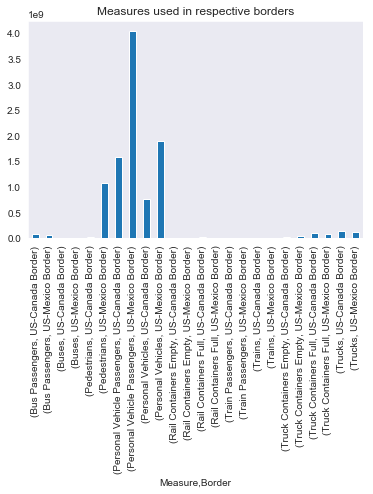

In [11]:
pf.groupby(["Measure","Border"]).sum()["Value"].plot(kind = 'bar');
plt.title("Measures used in respective borders");

In [12]:
pf.groupby(["Measure","Border"]).sum()["Value"]

Measure                      Border          
Bus Passengers               US-Canada Border      75934445
                             US-Mexico Border      70092929
Buses                        US-Canada Border       3165357
                             US-Mexico Border       5589037
Pedestrians                  US-Canada Border      13474580
                             US-Mexico Border    1076593384
Personal Vehicle Passengers  US-Canada Border    1586449974
                             US-Mexico Border    4043076782
Personal Vehicles            US-Canada Border     761000003
                             US-Mexico Border    1890535412
Rail Containers Empty        US-Canada Border      13036047
                             US-Mexico Border       9350352
Rail Containers Full         US-Canada Border      32211453
                             US-Mexico Border       8281197
Train Passengers             US-Canada Border       6177238
                             US-Mexico Border        2

Hence, it is clear that overall <b> Personal Vehicles </b> are used mostly to cross the border.

## Question 3 ##

Which are the specific ports that are sensitive ??

Well, it is clear by question 1, that which border is more sensitive, but now the question is there any particular state with the maximum tendency for border-crossing

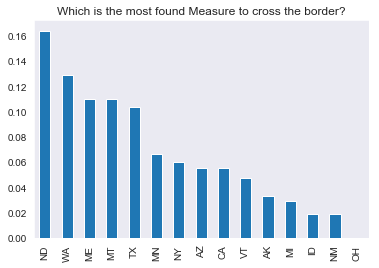

In [13]:
p_val = pf.State.value_counts()

(p_val/rows).plot(kind = 'bar');
plt.title("Which is the most found Measure to cross the border?");

In [14]:
pf.groupby("State").sum()["Value"].sort_values()

State
OH           607
AK      14676856
ID      21833390
MT      56139436
NM      68560332
ND      78600964
MN      99126985
VT     118116868
ME     236781464
WA     521397911
MI     775410321
NY     854042599
AZ     918287879
CA    2602572970
TX    3747879529
Name: Value, dtype: int64

Text(0.5, 1.0, 'Which state is more exposed to people crossing the border ?')

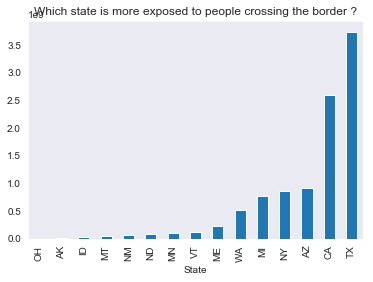

In [15]:
pf.groupby("State").sum()["Value"].sort_values().plot(kind = 'bar');
plt.title("Which state is more exposed to people crossing the border ?")

Hence it is clear by the fact that Texas has the highest tendency following California and Arizona.

Now, Let's observe if we can co-relate between the Results of Question 1 

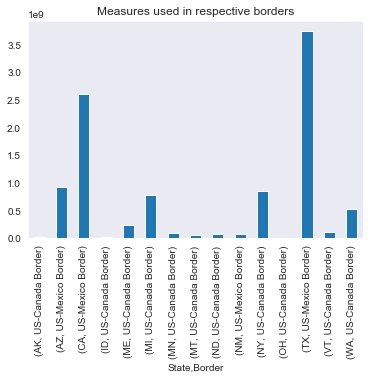

In [16]:
pf.groupby(["State","Border"]).sum()["Value"].plot(kind = 'bar');
plt.title("Measures used in respective borders");

The three most sensitive states (Texas, California, Arizona) are the one's lying along the US-Mexico and hence justifying the findings of Question 1

## Prepare Data ##

Now, We have established that a relation exists between the Value and Border, Measures,State. 

In order to find any particular time affecting Values, we need to analyse the Date with Values. Instead of directly working with dd-mm-yyyy format creating new frames of Date, Month, Year helps analyse the Data better !! Let's Check

In [17]:
pf['Date'] = pd.to_datetime(pf['Date']) # converting the date column to datetime format for ease of conversion
pf['Date'].head()


0   2020-02-01
1   2020-03-01
2   2020-04-01
3   2020-05-01
4   2020-06-01
Name: Date, dtype: datetime64[ns]

In [18]:
pf['year'] = pf['Date'].dt.year
pf['month'] = pf['Date'].dt.month
pf['day'] = pf['Date'].dt.day

In [19]:
pf.head()

,Port Name,State,Port Code,Border,Date,Measure,Value,year,month,day
0,Alcan,AK,3104,US-Canada Border,2020-02-01,Personal Vehicle Passengers,1414,2020,2,1
1,Alcan,AK,3104,US-Canada Border,2020-03-01,Personal Vehicles,763,2020,3,1
2,Alcan,AK,3104,US-Canada Border,2020-04-01,Truck Containers Empty,412,2020,4,1
3,Alcan,AK,3104,US-Canada Border,2020-05-01,Truck Containers Full,122,2020,5,1
4,Alcan,AK,3104,US-Canada Border,2020-06-01,Trucks,545,2020,6,1


The Result of the Previous cell shows that the new frames are added to main Dataframe and are ready to be observed. 

In [20]:
sum_crossing = pf.groupby("year").sum()["Value"].reset_index()
sum_crossing

,year,Value
0,1996,429790351
1,1997,494174198
2,1998,508588404
3,1999,538456724
4,2000,540021542
5,2001,493083902
6,2002,475702818
7,2003,456392653
8,2004,458220298
9,2005,450234268


## Question 4 ##

Now, the question arrises the relation between the time and Value, is there any preference of time where people find it easy to cross the border??

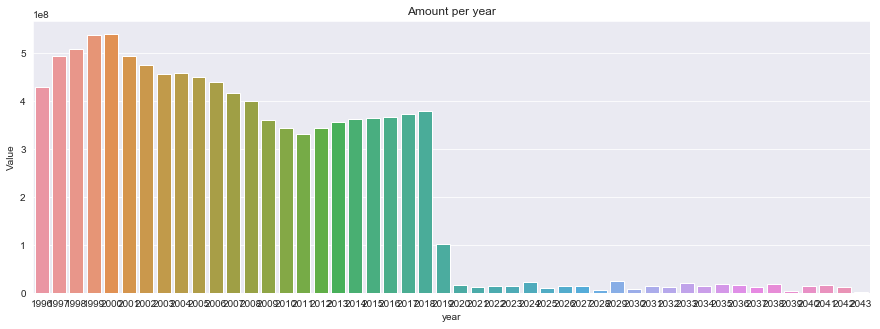

In [21]:
plt.figure(figsize=(15,5))
plt.grid()
sns.set_style('dark')
sns.barplot(x='year',y='Value',data=sum_crossing);
plt.title('Amount per year');

On analysing the data in a bar graph, it appears very conjusted and extends till 2043, but they are probably some of the predicted value that should not be incorporated in our training set in our 4th part, So it is better to drop . (Done later)

Now, Let's check the same for the date and month.

In [22]:
sum_month=pf.groupby('month').sum()['Value'].reset_index()

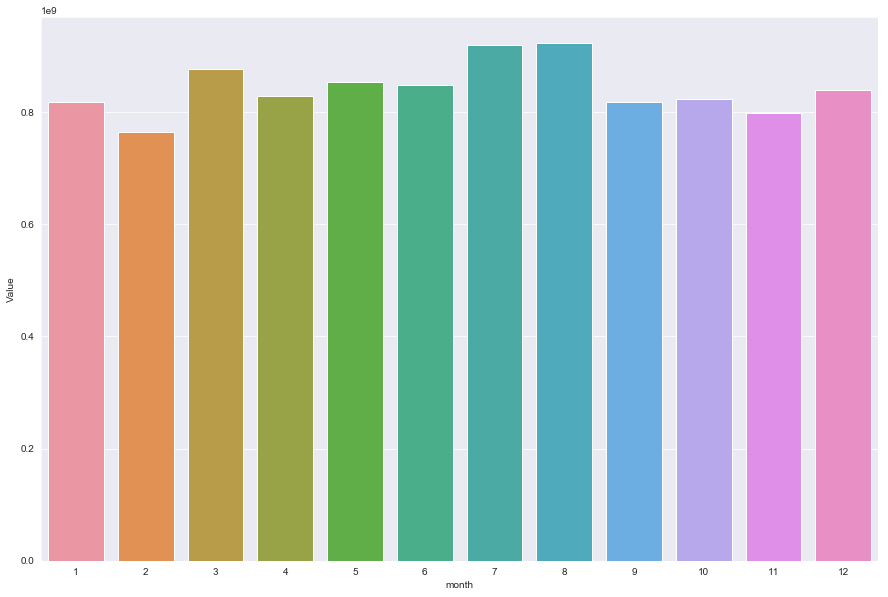

In [23]:
plt.figure(figsize=(15,10))
plt.grid()
sns.set_style('dark')
sns.barplot(x='month',y='Value',data=sum_month);

The month data is completely fine and shows a maximum rise generally in the Summer and Autumn Season, while a decrease in the Winter season. It can be due to the climatic condition in the Northern border.

In [24]:
sum_day=pf.groupby('day').sum()['Value'].reset_index()

Text(0.5, 1.0, 'Amount per year')

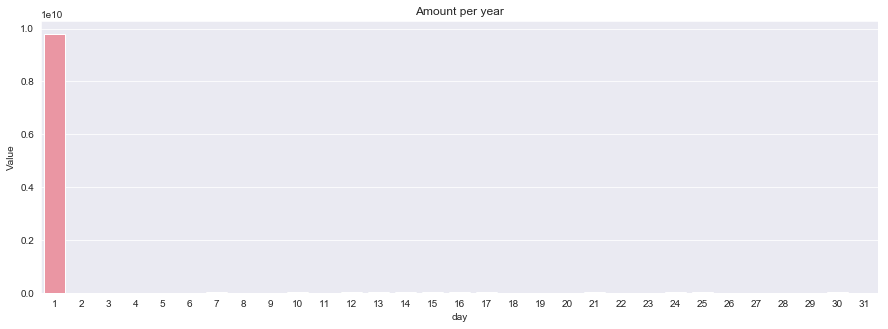

In [25]:
plt.figure(figsize=(15,5))
plt.grid()
sns.set_style('dark')
sns.barplot(x='day',y='Value',data=sum_day)
plt.title('Amount per year')

While analysing the data, the days are marked as 1. Therefore we can consider the day column of the dataset as a constant parameter. So, it is better to drop the value as a particular Scalar Quantity does not affect the result of a Linear Regression Model. 

Similarly, We have separated the components of date, so the date parameter vector can be thought of a linear dependent vector with the day,month,year vector. So, dropping it makes no such variation.

In [26]:
pf.drop(columns='day',inplace=True)

In [27]:
pf.drop(columns='Date',inplace=True)
pf.head()

,Port Name,State,Port Code,Border,Measure,Value,year,month
0,Alcan,AK,3104,US-Canada Border,Personal Vehicle Passengers,1414,2020,2
1,Alcan,AK,3104,US-Canada Border,Personal Vehicles,763,2020,3
2,Alcan,AK,3104,US-Canada Border,Truck Containers Empty,412,2020,4
3,Alcan,AK,3104,US-Canada Border,Truck Containers Full,122,2020,5
4,Alcan,AK,3104,US-Canada Border,Trucks,545,2020,6


Now, there are value of year which suggest some future predictions, instead of totally dumping them makes no sense, We can use it as a test value and test our final model of predicting the number of people crossing the border. 

So, I create a new data frame containing only the future predicted values.

In [28]:
pf['year'].max()

2043

In [29]:
place = [i for i in range(2021, 2044)]
replace = [np.nan for i in range(2021, 2044)]

In [30]:
model_pf = pf[pf['year'] > 2020]

In [31]:
pf["year"].replace(place, replace, inplace = True)

In [32]:
sum_crossing=pf.groupby("year").sum()["Value"].reset_index()

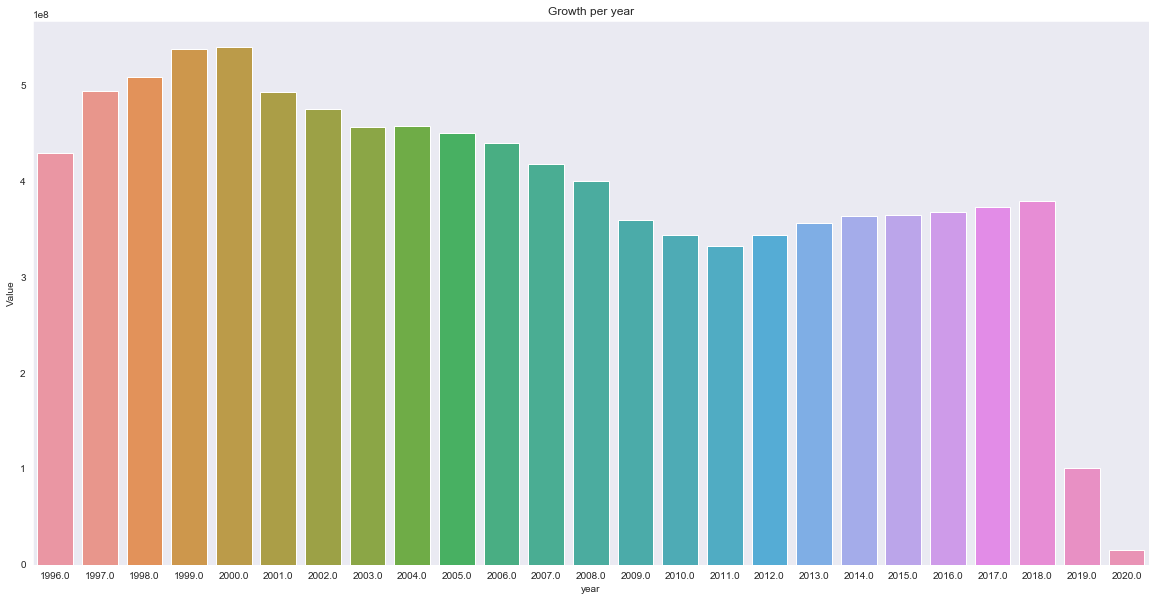

In [33]:
plt.figure(figsize=(20,10))
sns.barplot(x='year',y='Value',data=sum_crossing);
plt.title('Growth per year');

Yes!! Now, the data looks perfect and is ready to go. Now, all the data 

In [34]:
pf.describe()

,Port Code,Value,year,month
count,355511.000000,3.555110e+05,347451.000000,355511.000000
mean,2454.009921,2.844758e+04,2006.847515,6.446591
std,1201.900231,1.518807e+05,6.451848,3.455289
min,101.000000,0.000000e+00,1996.000000,1.000000
25%,2304.000000,0.000000e+00,2001.000000,3.000000
50%,3013.000000,1.000000e+02,2007.000000,6.000000
75%,3402.000000,2.597500e+03,2012.000000,9.000000
max,4105.000000,4.447374e+06,2020.000000,12.000000


In [35]:
pf = pf.dropna()

In [36]:
pf.select_dtypes(include=['object'])

,Port Name,State,Border,Measure
0,Alcan,AK,US-Canada Border,Personal Vehicle Passengers
1,Alcan,AK,US-Canada Border,Personal Vehicles
2,Alcan,AK,US-Canada Border,Truck Containers Empty
3,Alcan,AK,US-Canada Border,Truck Containers Full
4,Alcan,AK,US-Canada Border,Trucks
5,Alexandria Bay,NY,US-Canada Border,Bus Passengers
6,Alexandria Bay,NY,US-Canada Border,Buses
7,Alexandria Bay,NY,US-Canada Border,Personal Vehicle Passengers
8,Alexandria Bay,NY,US-Canada Border,Personal Vehicles
9,Alexandria Bay,NY,US-Canada Border,Truck Containers Empty


Now, there are some presence of categorical data (data that are bound to some specific values) while others are continuous values and can take any values over their interval. 

The categorical values resembling real values can be directly fed to the model, but incase of **object** values, it cannot be directly fed to prediction model. So, it is better to replace them with some dummy variables.

In [37]:
d_border = {'US-Canada Border': 0,'US-Mexico Border': 1}
pf['Border'].replace(d_border ,inplace=True)

In [38]:
d_state={'AK' : 0, 'ND' : 1, 'ME' : 2, 'CA' : 3, 'WA' : 4, 'MT' : 5, 'NY' : 6, 'OH' : 7, 'ID' : 8, 'NM' : 9, 'MN' : 10, 'VT' :11,
         'MI' : 12, 'AZ' :13, 'TX' : 14}
pf['State'].replace(d_state ,inplace=True)

In [39]:
d_measure={'Trains' : 0, 'Train Passengers' : 1, 'Buses' : 2, 'Rail Containers Empty' : 3, 'Rail Containers Full' : 4,
            'Truck Containers Empty' : 5, 'Bus Passengers' : 6, 'Truck Containers Full' : 7, 'Trucks' : 8, 'Pedestrians' : 9,
            'Personal Vehicles' : 10, 'Personal Vehicle Passengers' : 11,}
pf['Measure'].replace(d_measure ,inplace=True)

## Question 5 ##

Now, the main question, is there any way to predict the values of Border-Crossing traffic?

To find out the answer it is best suited to obsverse the data changes and the correlation between different features

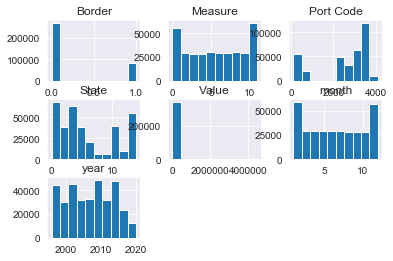

In [40]:
pf.hist();

For every port, there exist an unique postal code, So instead of using the Postal name as a feature, the provided Postal code is used. 

The histogram clearly shows a relation between the different parameters of the datatset with the prediction value

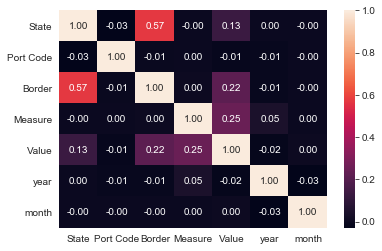

In [41]:
sns.heatmap(pf.corr(), annot=True, fmt=".2f");

The heatmap suggest a strong correlation with border parameter, measures and state. While a not so much significant but a relation between Postal Code and Value.

In [42]:
pf.info();

<class 'pandas.core.frame.DataFrame'>
Int64Index: 347451 entries, 0 to 355510
Data columns (total 8 columns):
Port Name    347451 non-null object
State        347451 non-null int64
Port Code    347451 non-null int64
Border       347451 non-null int64
Measure      347451 non-null int64
Value        347451 non-null int64
year         347451 non-null float64
month        347451 non-null int64
dtypes: float64(1), int64(6), object(1)
memory usage: 23.9+ MB


## Model Data ##

Now the important aspect is to predict the values observing a specific trend.

A **Linear Regression** model is used from sklearn package of python to observe the charecteristic and predict the trend. The **R2 score** is used for determining the correctness of the model

In [43]:
pf.columns

Index(['Port Name', 'State', 'Port Code', 'Border', 'Measure', 'Value', 'year',
       'month'],
      dtype='object')

The total training set is divided to train and test modules to avoid overfitting of the data and for a better evaluation. The data is randomly arranged to make the training set more uniformly arranged.

In [44]:
X = pf[['State', 'Port Code', 'Border', 'Measure', 'year', 'month']]
y = pf['Value']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [45]:
lm = LinearRegression(normalize = True)
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [46]:
y_pred_test = lm.predict(X_test)
y_pred_train = lm.predict(X_train)
Score_test = r2_score(y_test, y_pred_test)
Score_train = r2_score(y_train, y_pred_train)
print(Score_train, Score_test)

0.107759889565 0.112200870225


The same score in case of Test and Train Set suggest that the model is not overfitted.

## Results ##

The model trained in the previous part is used for future predictions. The input features being the ones that were extracted from the Data Analysing phase (year > 2020).

In [47]:
model_pf['Border'].replace(d_border ,inplace=True)
model_pf['State'].replace(d_state ,inplace=True)
model_pf['Measure'].replace(d_measure ,inplace=True)
model_pf.head()

,Port Name,State,Port Code,Border,Measure,Value,year,month
365,Lukeville,13,2602,1,10,25359,2021,1
366,Lukeville,13,2602,1,5,2,2021,2
367,Lukeville,13,2602,1,7,22,2021,3
368,Lukeville,13,2602,1,8,25,2021,4
369,Lynden,4,3023,0,9,71,2021,5


In [48]:
X_test_2 = model_pf[['State', 'Port Code', 'Border', 'Measure', 'year', 'month']]
y_test_2 = model_pf['Value']
y_pred_2 = lm.predict(X_test_2)
Score_2 = r2_score(y_test_2, y_pred_2)
Score_2

0.13376078937241265

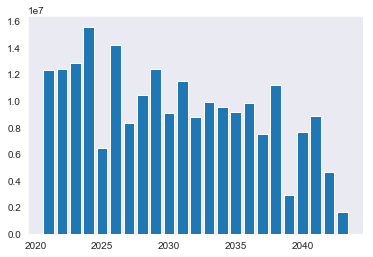

In [49]:
d={}
count=0
for y in X_test_2['year']:
    try:
        d[y]+= y_pred_2[count]
    except KeyError:
        d[y] = y_pred_2[count]
    count+=1
lists = sorted(d.items()) # sorted by key, return a list of tuples

x, y = zip(*lists) # unpack a list of pairs into two tuples

plt.bar(x, y)
plt.show()

Text(0.5, 1.0, 'As Predicted in Dataset')

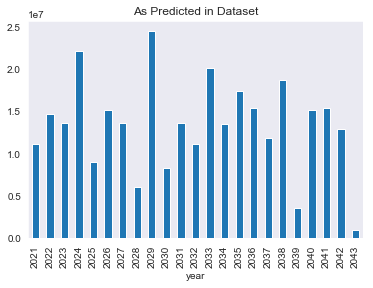

In [50]:
model_pf.groupby('year').sum()['Value'].plot(kind = 'bar');
plt.title("As Predicted in Dataset")

The Predicted values are approximately similar and shows same behaviours. 

The fluctuations in the middle are a result of the 2020 dataset that is affected by the **COVID-19** pandemic.

## Deployment ##

The Jupyter Notebook is available in Github:- https://github.com/deadshotsb/US-Border-Crossing-Analysis

For furthur Explanation please visite the blog in medium:- https://medium.com/p/420fc0abb1c3/edit

Thank you for your time and support.